# Homework 5 - Assigment 2

In this part of the homework, we are asked to perform sentiment analysis on every email message and infer Hillary Clinton's perception of the different world countries.

## import cleaned data

We will start by importing the pre-processed dataset, saved in the part 1 notebook.

In [1]:
# basic imports 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import nltk
import pycountry
from nltk.sentiment import SentimentIntensityAnalyzer


# filenames
clean_emails_filename ='preprocessed_emails.csv'
clean_emails = pd.read_csv(clean_emails_filename,index_col = 0, header = 0).dropna(how='all')

In [2]:
clean_emails.columns = ['Email Text']
clean_emails = clean_emails.set_index(np.arange(clean_emails.shape[0]))
clean_emails.head()

,Email Text
0,wow
1,2011 945 latest syria aid qaddafi sid hrc memo...
2,chri steven thx
3,cairo condemn final
4,11 2011 136 huma abedin latest syria aid qadda...


## World Countries

First, we should find all the mentions of world countries in the whole corpus, using the pycountry utility.

We will start by investigating the pycountry utility.

In [3]:
print('Number of countries : {}.'.format(len(pycountry.countries)))

i = 0
for c in pycountry.countries:
    i = i+1
    print(c)
    if i>10:
        break

Number of countries : 249.
Country(alpha_2='AW', alpha_3='ABW', name='Aruba', numeric='533')
Country(alpha_2='AF', alpha_3='AFG', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan')
Country(alpha_2='AO', alpha_3='AGO', name='Angola', numeric='024', official_name='Republic of Angola')
Country(alpha_2='AI', alpha_3='AIA', name='Anguilla', numeric='660')
Country(alpha_2='AX', alpha_3='ALA', name='Åland Islands', numeric='248')
Country(alpha_2='AL', alpha_3='ALB', name='Albania', numeric='008', official_name='Republic of Albania')
Country(alpha_2='AD', alpha_3='AND', name='Andorra', numeric='020', official_name='Principality of Andorra')
Country(alpha_2='AE', alpha_3='ARE', name='United Arab Emirates', numeric='784')
Country(alpha_2='AR', alpha_3='ARG', name='Argentina', numeric='032', official_name='Argentine Republic')
Country(alpha_2='AM', alpha_3='ARM', name='Armenia', numeric='051', official_name='Republic of Armenia')
Country(alpha_2='AS', alpha_3='ASM

Each country has three relevent components for us, which are : alpha_2, alpha_3 and name. We will put all these elements in a list, indexed by the coutries names.

In [4]:
countries = {}

for country in pycountry.countries:
    countries[country.name] = [country.name.lower(), country.alpha_2.lower(), country.alpha_3.lower()]
    
countries

{'Afghanistan': ['afghanistan', 'af', 'afg'],
 'Albania': ['albania', 'al', 'alb'],
 'Algeria': ['algeria', 'dz', 'dza'],
 'American Samoa': ['american samoa', 'as', 'asm'],
 'Andorra': ['andorra', 'ad', 'and'],
 'Angola': ['angola', 'ao', 'ago'],
 'Anguilla': ['anguilla', 'ai', 'aia'],
 'Antarctica': ['antarctica', 'aq', 'ata'],
 'Antigua and Barbuda': ['antigua and barbuda', 'ag', 'atg'],
 'Argentina': ['argentina', 'ar', 'arg'],
 'Armenia': ['armenia', 'am', 'arm'],
 'Aruba': ['aruba', 'aw', 'abw'],
 'Australia': ['australia', 'au', 'aus'],
 'Austria': ['austria', 'at', 'aut'],
 'Azerbaijan': ['azerbaijan', 'az', 'aze'],
 'Bahamas': ['bahamas', 'bs', 'bhs'],
 'Bahrain': ['bahrain', 'bh', 'bhr'],
 'Bangladesh': ['bangladesh', 'bd', 'bgd'],
 'Barbados': ['barbados', 'bb', 'brb'],
 'Belarus': ['belarus', 'by', 'blr'],
 'Belgium': ['belgium', 'be', 'bel'],
 'Belize': ['belize', 'bz', 'blz'],
 'Benin': ['benin', 'bj', 'ben'],
 'Bermuda': ['bermuda', 'bm', 'bmu'],
 'Bhutan': ['bhutan', 'b

In [5]:
def country_mentions(mail,countries):
    mentionned_countries = []
    tokens = set(nltk.word_tokenize(mail))
    for country, names in countries.items():
        if not tokens.isdisjoint(set(names)):
            mentionned_countries.append(country)
    return mentionned_countries

In [6]:
country_mentions(clean_emails.iloc[20,0],countries)

['Libya']

In [7]:
mentionned_countries = {}

for i in np.arange(clean_emails.shape[0]): 
    mail = clean_emails.iloc[i,0]
    mentionned_countries[i] =  country_mentions(mail,countries)

mentionned_countries = pd.Series(mentionned_countries)
clean_emails['Countries'] = mentionned_countries
clean_emails.head()

,Email Text,Countries
0,wow,[]
1,2011 945 latest syria aid qaddafi sid hrc memo...,[Libya]
2,chri steven thx,[]
3,cairo condemn final,[]
4,11 2011 136 huma abedin latest syria aid qadda...,[Libya]


In [8]:
print('Number of emails : {}.'.format(clean_emails.shape[0]))
# suppress emails without any country mention
clean_emails = clean_emails[[(countries != []) for countries in clean_emails['Countries']]]
print('Number of emails with coutries\' mentions: {}.'.format(clean_emails.shape[0]))
clean_emails = clean_emails.set_index(np.arange(clean_emails.shape[0]))
clean_emails.head()

Number of emails : 7510.
Number of emails with coutries' mentions: 2752.


,Email Text,Countries
0,2011 945 latest syria aid qaddafi sid hrc memo...,[Libya]
1,11 2011 136 huma abedin latest syria aid qadda...,[Libya]
2,right wing extremist behind antimuslim film sp...,[United States]
3,antimuslim film director hide follow libya egy...,"[Egypt, Libya]"
4,11 2011 136 huma abedin latest syria aid qadda...,[Libya]


## Sentiment analysis - Vader_analyzer

We will now perform sentiment analysis on every email message using the demo method 'Vader_analyzer' in the nltk.sentiment.util module.

In [9]:
vader_analyzer = SentimentIntensityAnalyzer()

sentiments = {}
id = 1

for i in np.arange(clean_emails.shape[0]): 
    mail = clean_emails.iloc[i,0]
    score = vader_analyzer.polarity_scores(mail)['compound']
    sentiments[i] = score
            
sentiments = pd.Series(sentiments)
clean_emails['Polarity'] = sentiments
clean_emails.head()

,Email Text,Countries,Polarity
0,2011 945 latest syria aid qaddafi sid hrc memo...,[Libya],0.0000
1,11 2011 136 huma abedin latest syria aid qadda...,[Libya],0.0000
2,right wing extremist behind antimuslim film sp...,[United States],-0.5994
3,antimuslim film director hide follow libya egy...,"[Egypt, Libya]",-0.1779
4,11 2011 136 huma abedin latest syria aid qadda...,[Libya],0.0000


## Countries' perception

### Aggregation

We will now aggregate the polarity information of all the emails by country.
We will start by expanding each element in the 'Countries' column into multiple rows :

In [10]:
rows = []
_ = clean_emails.apply(lambda row: [rows.append([row['Email Text'], nn, row['Polarity']]) 
                         for nn in row.Countries], axis=1)
clean_emails_new = pd.DataFrame(rows, columns=clean_emails.columns)

In [11]:
clean_emails_new.head()

,Email Text,Countries,Polarity
0,2011 945 latest syria aid qaddafi sid hrc memo...,Libya,0.0000
1,11 2011 136 huma abedin latest syria aid qadda...,Libya,0.0000
2,right wing extremist behind antimuslim film sp...,United States,-0.5994
3,antimuslim film director hide follow libya egy...,Egypt,-0.1779
4,antimuslim film director hide follow libya egy...,Libya,-0.1779


We will now take only the 'Countries' and 'Polarity' columns.

In [12]:
countries_polarity = clean_emails_new[['Countries', 'Polarity']]
countries_polarity.head()

,Countries,Polarity
0,Libya,0.0000
1,Libya,0.0000
2,United States,-0.5994
3,Egypt,-0.1779
4,Libya,-0.1779


For each country, we will take the mean of all polarities as the global perception.

In [13]:
countries_polarity = countries_polarity.groupby('Countries').agg('mean').sort_values('Polarity')
countries_polarity.head()

,Polarity
Countries,
Latvia,-0.979600
Bermuda,-0.646267
Vanuatu,-0.618150
Syrian Arab Republic,-0.383950
Gibraltar,-0.373900


### Plotting the results

We will now plot a histogram, ordered and colored by polarity level, that summarizes the perception of the different countries.

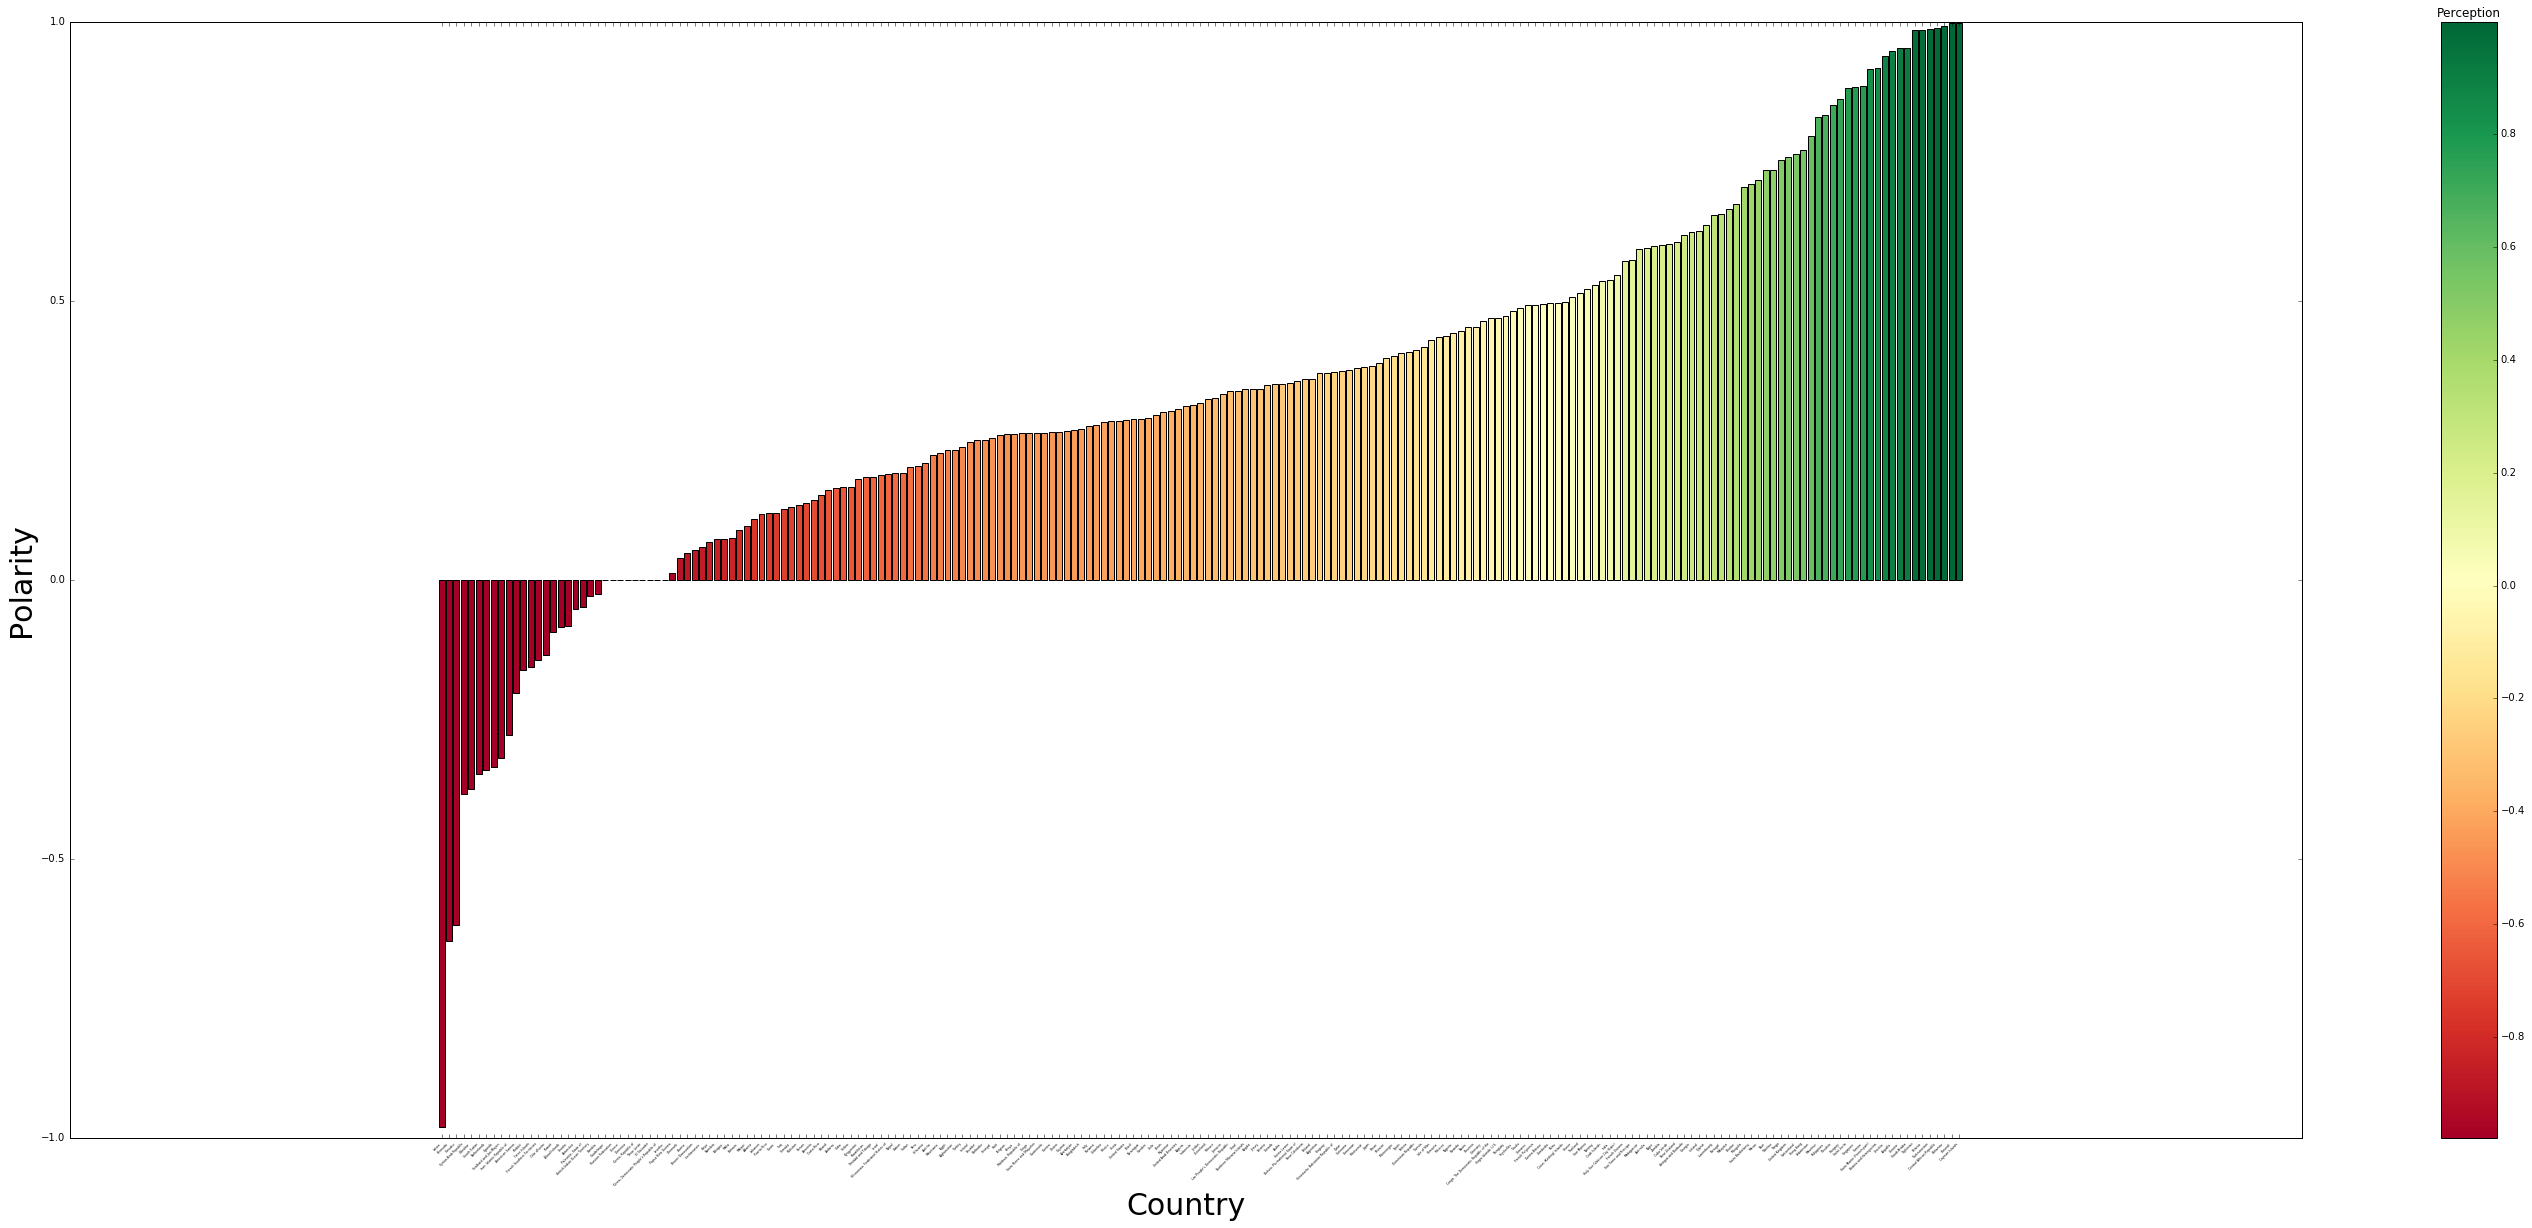

In [14]:
# Set up colors : red to green
plt.figure(figsize = (50,20))
y = np.array(countries_polarity['Polarity'])
colors = cm.RdYlGn(y / float(max(y)))
plot = plt.scatter(y, y, c=y, cmap = 'RdYlGn')
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Perception")

# Display bar plot : country frequency vs. country name, with color indicating polarity score
plt.bar(range(countries_polarity.shape[0]), countries_polarity['Polarity'], align='center', tick_label=countries_polarity.index, color=colors)
plt.xticks(rotation=45, ha='right',fontsize = 3)
plt.xlabel("Country",fontsize = 30)
plt.ylabel("Polarity",fontsize = 30)
plt.show()

To make the results more visible, we will show them part by part.

In [15]:
# Countries with negative polarity only
neg_polarity = countries_polarity[countries_polarity.Polarity<=0]
neg_polarity.head()

,Polarity
Countries,
Latvia,-0.979600
Bermuda,-0.646267
Vanuatu,-0.618150
Syrian Arab Republic,-0.383950
Gibraltar,-0.373900


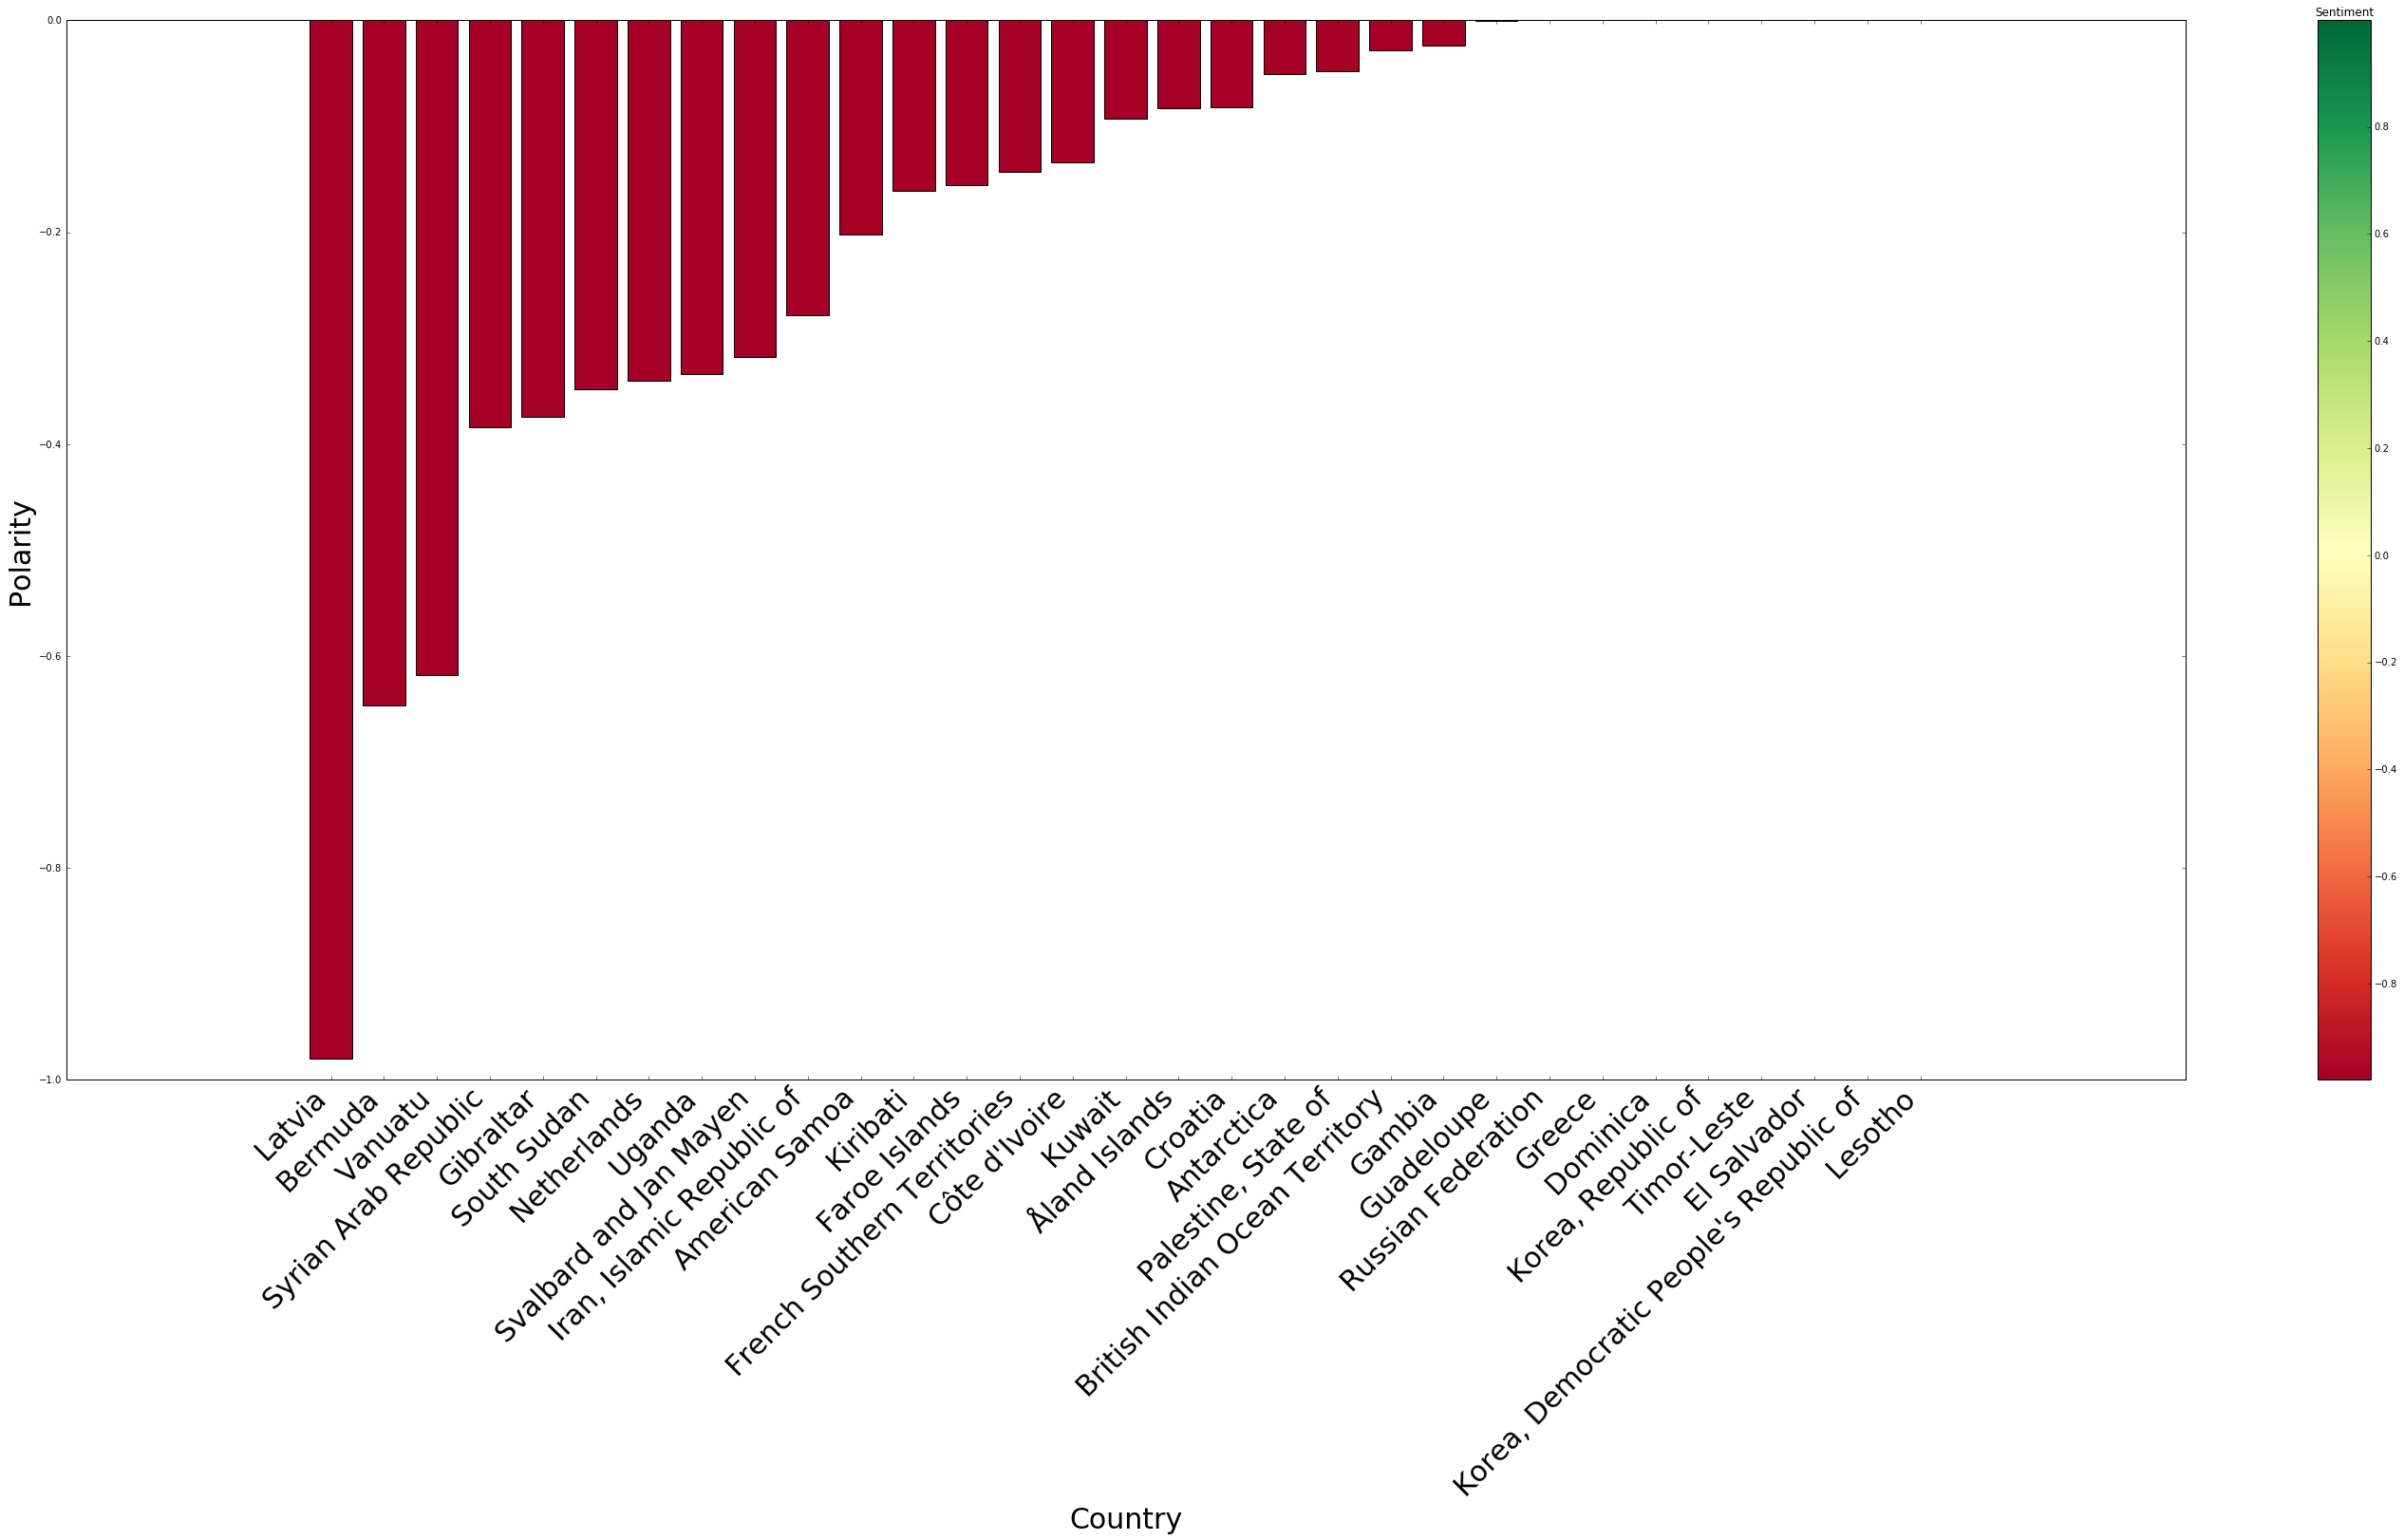

In [16]:
plt.figure(figsize = (50,20))
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Sentiment")

plt.bar(range(neg_polarity.shape[0]), neg_polarity['Polarity'], align='center', tick_label=neg_polarity.index, color=colors)
plt.xticks(rotation=45, ha='right',fontsize = 30)
plt.xlabel("Country",fontsize = 30)
plt.ylabel("Polarity",fontsize = 30)
plt.show()

In [17]:
# Countries with positive perception
pos_polarity = countries_polarity[countries_polarity.Polarity>0]
pos_polarity.head()

,Polarity
Countries,
Papua New Guinea,0.012033
Denmark,0.040450
Liberia,0.049444
Brunei Darussalam,0.053286
Liechtenstein,0.059355


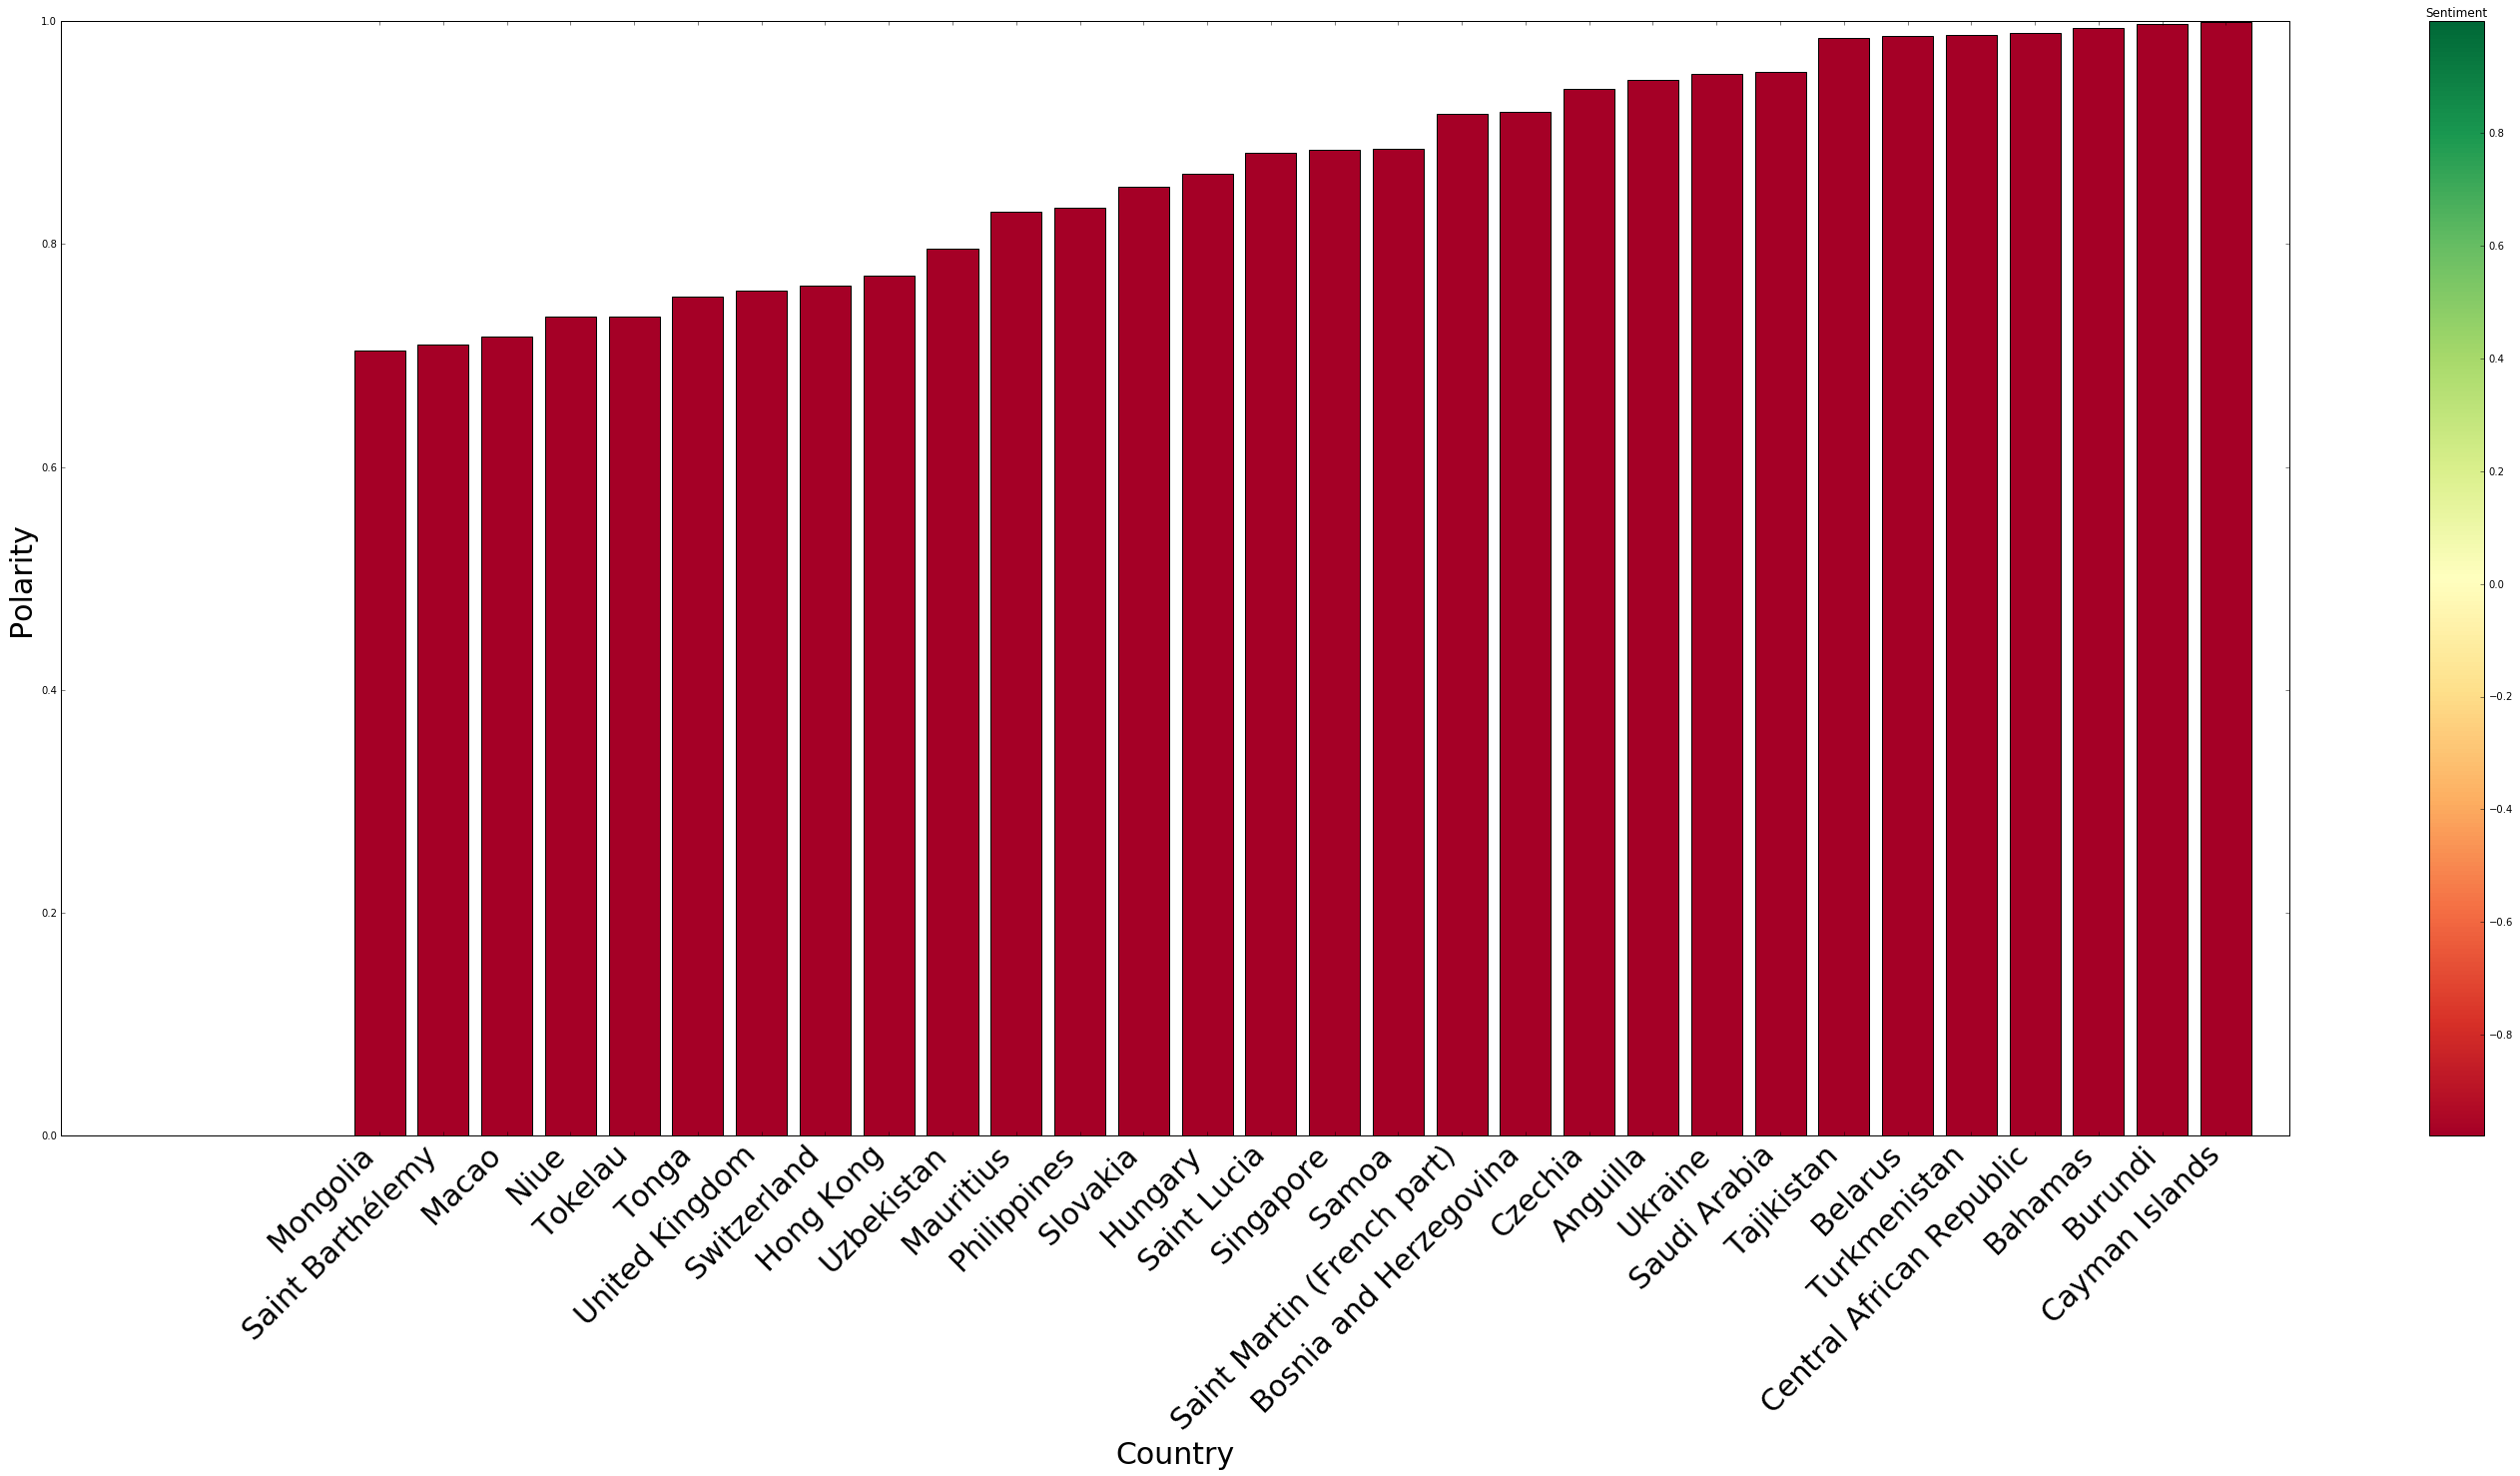

In [18]:
plt.figure(figsize = (50,20))
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Sentiment")

plt.bar(range(pos_polarity[-30:].shape[0]), pos_polarity[-30:]['Polarity'], align='center', tick_label=pos_polarity[-30:].index, color=colors)
plt.xticks(rotation=45, ha='right',fontsize = 30)
plt.xlabel("Country",fontsize = 30)
plt.ylabel("Polarity",fontsize = 30)
plt.show()

## Other methods

Repeat the aggregation + plotting steps using different demo methods from the sentiment analysis module -- can you find substantial differences?